(60000, 28, 28) (60000,) (10000, 28, 28)
[5 0 4 1]
(60000, 10)
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_15 (Flatten)        (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 10)                7850      
                                                                 
 softmax_15 (Softmax)        (None, 10)                0         
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1000/1000 [==============================] - 3s 2ms/step - loss: 0.0225 - accuracy: 0.8673
Epoch 2/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0137 - accuracy: 0.9143
Epoch 3/10
1000/

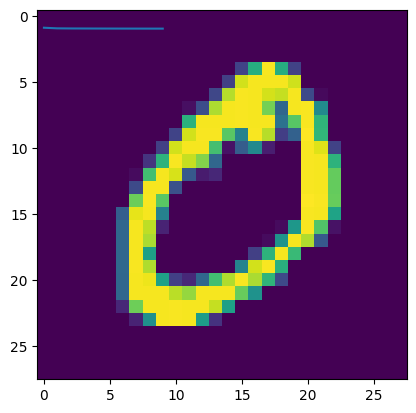

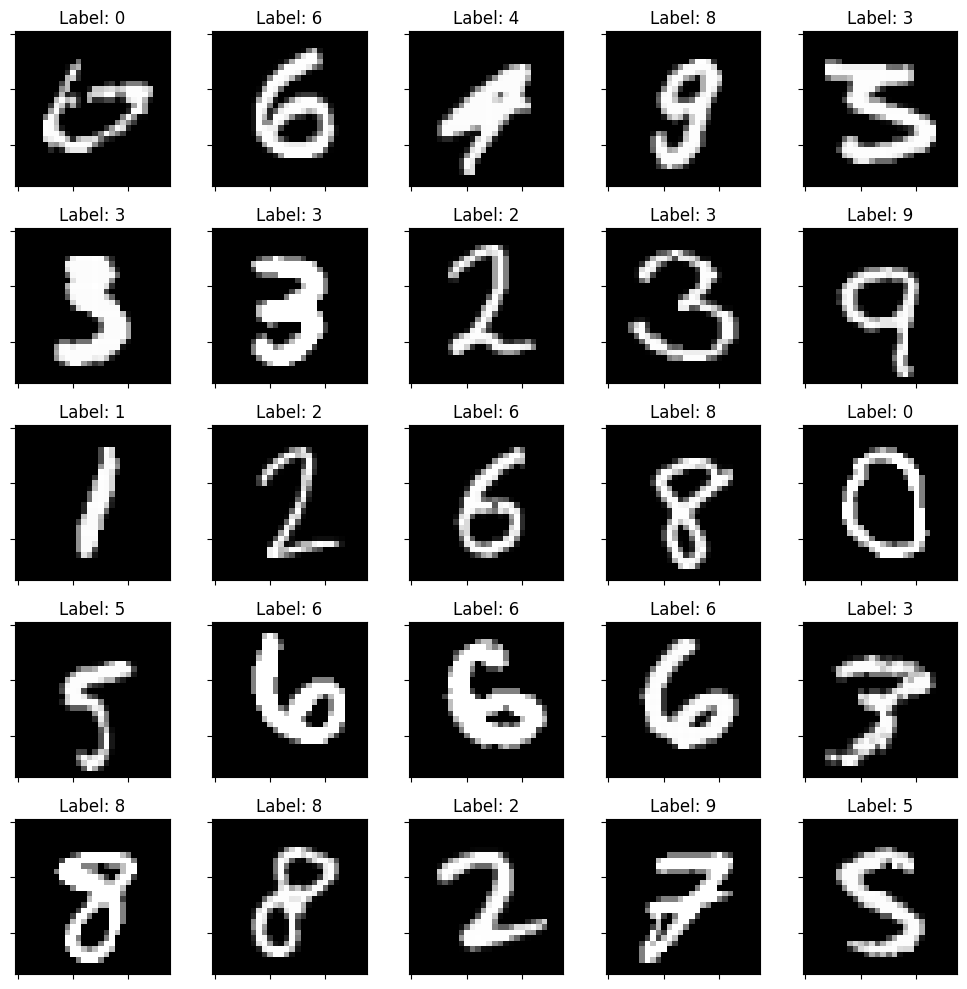

In [16]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from matplotlib import pyplot as plt
numClasses = 10
numFeatures = 784
lr = 0.001
# MNIST data
(xTrain, yTrain),(xTest, yTest) = mnist.load_data()
xTrain, xTest = np.array(xTrain, np.float32), np.array(xTest, np.float32) # uint8
#xTrain, xTest = xTrain.reshape([-1,numFeatures]), xTest.reshape([-1,numFeatures])
xTrain, xTest = xTrain/255., xTest/255.
print(xTrain.shape,yTrain.shape, xTest.shape)

# num_row = 5
# num_col = 5# plot images
# fig, axes = plt.subplots(num_row, num_col, figsize=(2*num_col,2*num_row))
# for i in range(25):
#     ax = axes[i//num_col, i%num_col]
#     ax.imshow(xTrain[i+,:,:], cmap='gray')
#     ax.set_title('Label: {}'.format(yTrain[i+]))
#     ax.tick_params(labelbottom=False)
#     ax.tick_params(labelleft=False)
# plt.tight_layout()

# plt.show()

plt.imshow(xTrain[1,:,:])

print(yTrain[:4])

label = tf.one_hot(yTrain, numClasses)
print(label.shape)

label[:4,:]

# # Prepare the training dataset
# train_dataset = tf.data.Dataset.from_tensor_slices((xTrain, yTrain))
# train_dataset = train_dataset.shuffle(buffer_size=1024).batch(64)

# # Prepare the validation dataset
# val_dataset = tf.data.Dataset.from_tensor_slices((xTest, yTest))
# val_dataset = val_dataset.batch(64)

layers = []

layers.append(tf.keras.layers.Flatten(input_shape=(28, 28)))
layers.append(tf.keras.layers.Dense(10))
layers.append(tf.keras.layers.Softmax())

model = Sequential(layers)

model.summary()

model.compile(
    optimizer=tf.keras.optimizers.Adam(lr),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=['accuracy'],
)

history = model.fit(xTrain, label, epochs=10, batch_size = 60)

plt.plot(history.history['accuracy'])

predY = model.predict(xTest)
classLabel = tf.argmax(predY, 1)

print(classLabel.shape)
print(predY.shape)

xTestImg = np.reshape(xTest, [-1,28,28])

startIndex = 445
num_row = 5
num_col = 5# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(2*num_col,2*num_row))
for i in range(25):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(xTestImg[i+startIndex,:,:], cmap='gray')
    ax.set_title('Label: {}'.format(classLabel[i+startIndex]))
    ax.tick_params(labelbottom=False)
    ax.tick_params(labelleft=False)
plt.tight_layout()

plt.show()

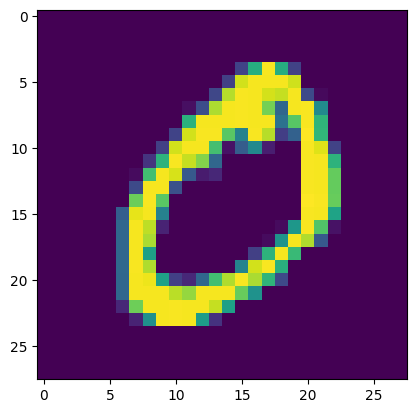

[5 0 4 1]
(60000, 10)
tf.Tensor(
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(4, 10), dtype=float32)
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_15 (Flatten)        (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 10)                7850      
                                                                 
 softmax_15 (Softmax)        (None, 10)                0         
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0102 - a

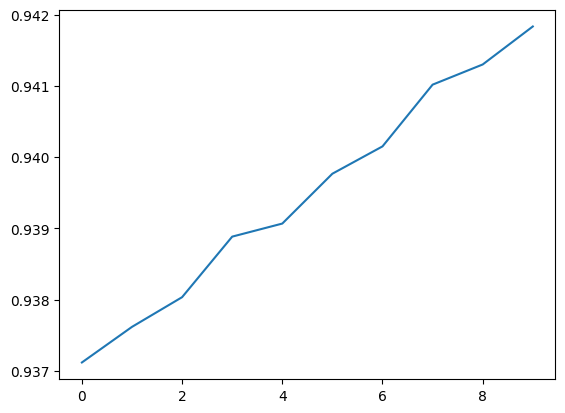

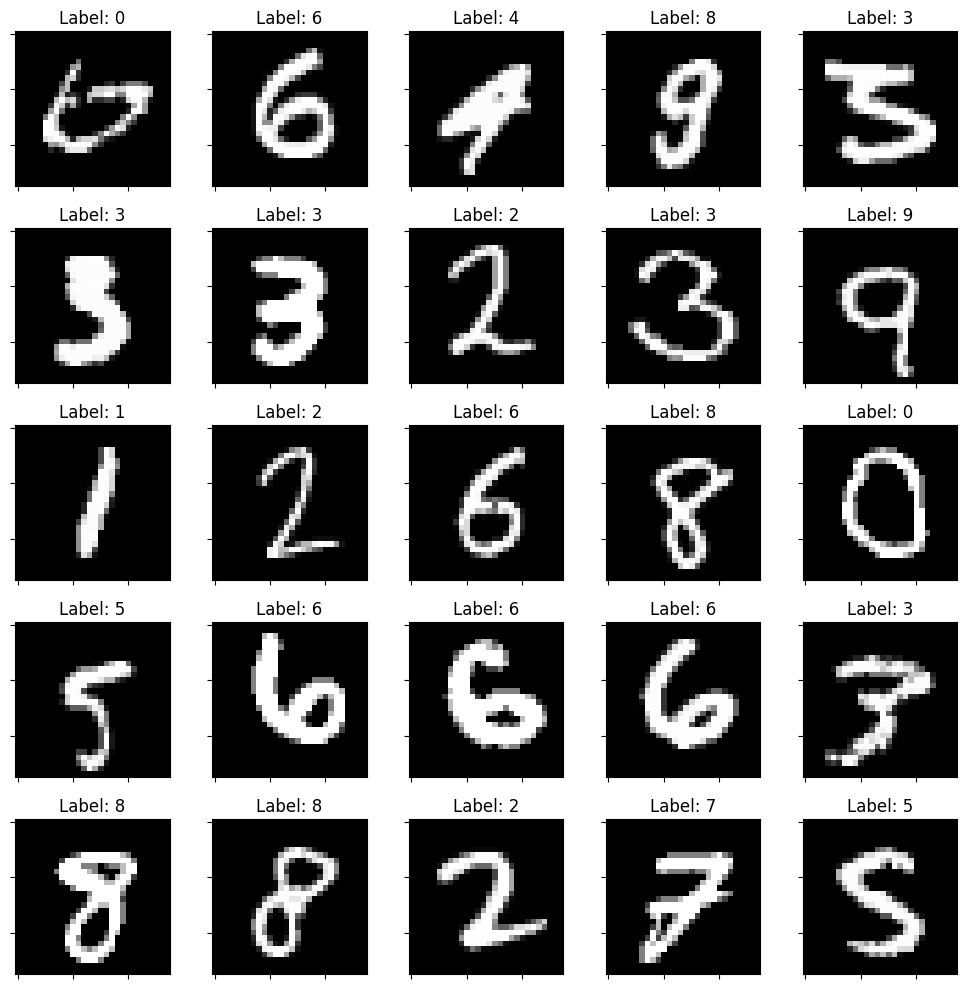

In [17]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from matplotlib import pyplot as plt

numClasses = 10
numFeatures = 784
lr = 0.001

# MNIST data
(xTrain, yTrain), (xTest, yTest) = mnist.load_data()
xTrain, xTest = np.array(xTrain, np.float32), np.array(xTest, np.float32)
xTrain, xTest = xTrain / 255., xTest / 255.

plt.imshow(xTrain[1, :, :])
plt.show()

print(yTrain[:4])

# One-hot encode labels with the correct number of classes
label = tf.one_hot(yTrain, numClasses)
print(label.shape)
print(label[:4, :])

layers = []
layers.append(tf.keras.layers.Flatten(input_shape=(28, 28)))
layers.append(tf.keras.layers.Dense(30))  # Adjusted to 30 neurons
layers.append(tf.keras.layers.Softmax())

model.summary()

model.compile(
    optimizer=tf.keras.optimizers.Adam(lr),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=['accuracy'],
)

history = model.fit(xTrain, label, epochs=10, batch_size=60)

plt.plot(history.history['accuracy'])

predY = model.predict(xTest)
classLabel = tf.argmax(predY, 1)

print(classLabel.shape)
print(predY.shape)

xTestImg = np.reshape(xTest, [-1, 28, 28])

startIndex = 445
num_row = 5
num_col = 5
fig, axes = plt.subplots(num_row, num_col, figsize=(2 * num_col, 2 * num_row))
for i in range(25):
    ax = axes[i // num_col, i % num_col]
    ax.imshow(xTestImg[i + startIndex, :, :], cmap='gray')
    ax.set_title('Label: {}'.format(classLabel[i + startIndex]))
    ax.tick_params(labelbottom=False)
    ax.tick_params(labelleft=False)
plt.tight_layout()

plt.show()


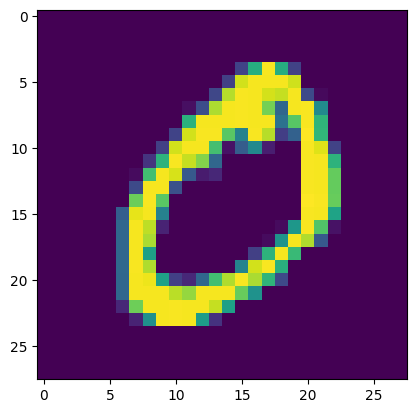

[5 0 4 1]
(60000, 10)
tf.Tensor(
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(4, 10), dtype=float32)
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_15 (Flatten)        (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 10)                7850      
                                                                 
 softmax_15 (Softmax)        (None, 10)                0         
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1000/1000 [==============================] - 4s 3ms/step - loss: 0.0088 - a

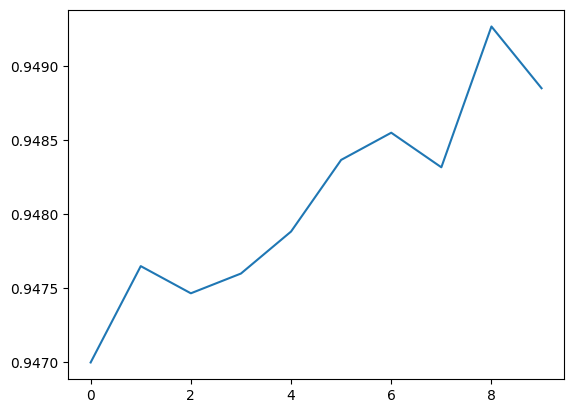

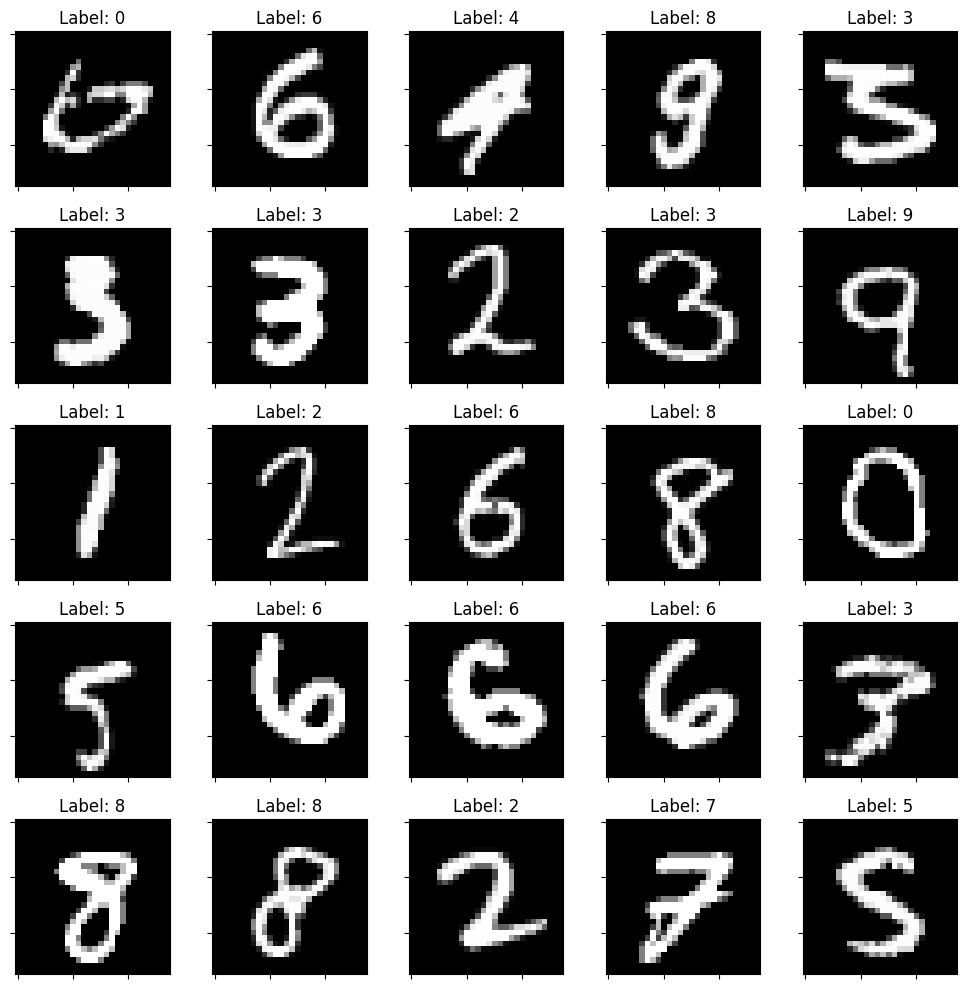

In [20]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from matplotlib import pyplot as plt

numClasses = 10
numFeatures = 784
lr = 0.001

# MNIST data
(xTrain, yTrain), (xTest, yTest) = mnist.load_data()
xTrain, xTest = np.array(xTrain, np.float32), np.array(xTest, np.float32)
xTrain, xTest = xTrain / 255., xTest / 255.

plt.imshow(xTrain[1, :, :])
plt.show()

print(yTrain[:4])

# One-hot encode labels with the correct number of classes
label = tf.one_hot(yTrain, numClasses)
print(label.shape)
print(label[:4, :])

layers = []
layers.append(tf.keras.layers.Flatten(input_shape=(28, 28)))
layers.append(tf.keras.layers.Dense(512))  # Adjusted to 512 neurons
layers.append(tf.keras.layers.Softmax())

model.summary()

model.compile(
    optimizer=tf.keras.optimizers.Adam(lr),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=['accuracy'],
)

history = model.fit(xTrain, label, epochs=10, batch_size=60)

plt.plot(history.history['accuracy'])

predY = model.predict(xTest)
classLabel = tf.argmax(predY, 1)

print(classLabel.shape)
print(predY.shape)

xTestImg = np.reshape(xTest, [-1, 28, 28])

startIndex = 445
num_row = 5
num_col = 5
fig, axes = plt.subplots(num_row, num_col, figsize=(2 * num_col, 2 * num_row))
for i in range(25):
    ax = axes[i // num_col, i % num_col]
    ax.imshow(xTestImg[i + startIndex, :, :], cmap='gray')
    ax.set_title('Label: {}'.format(classLabel[i + startIndex]))
    ax.tick_params(labelbottom=False)
    ax.tick_params(labelleft=False)
plt.tight_layout()

plt.show()


(60000, 28, 28) (60000,) (10000, 28, 28)
[5 0 4 1]
(60000, 10)
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_20 (Flatten)        (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 10)                7850      
                                                                 
 softmax_20 (Softmax)        (None, 10)                0         
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0888 - accuracy: 0.5430
Epoch 2/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0877 - accuracy: 0.5560
Epoch 3/10
1000/

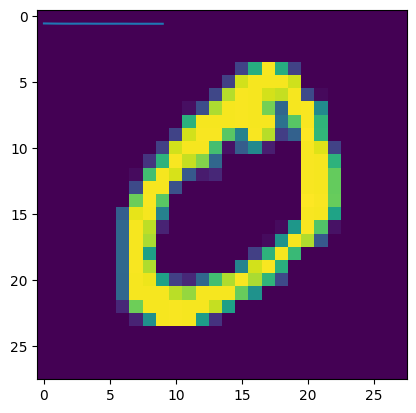

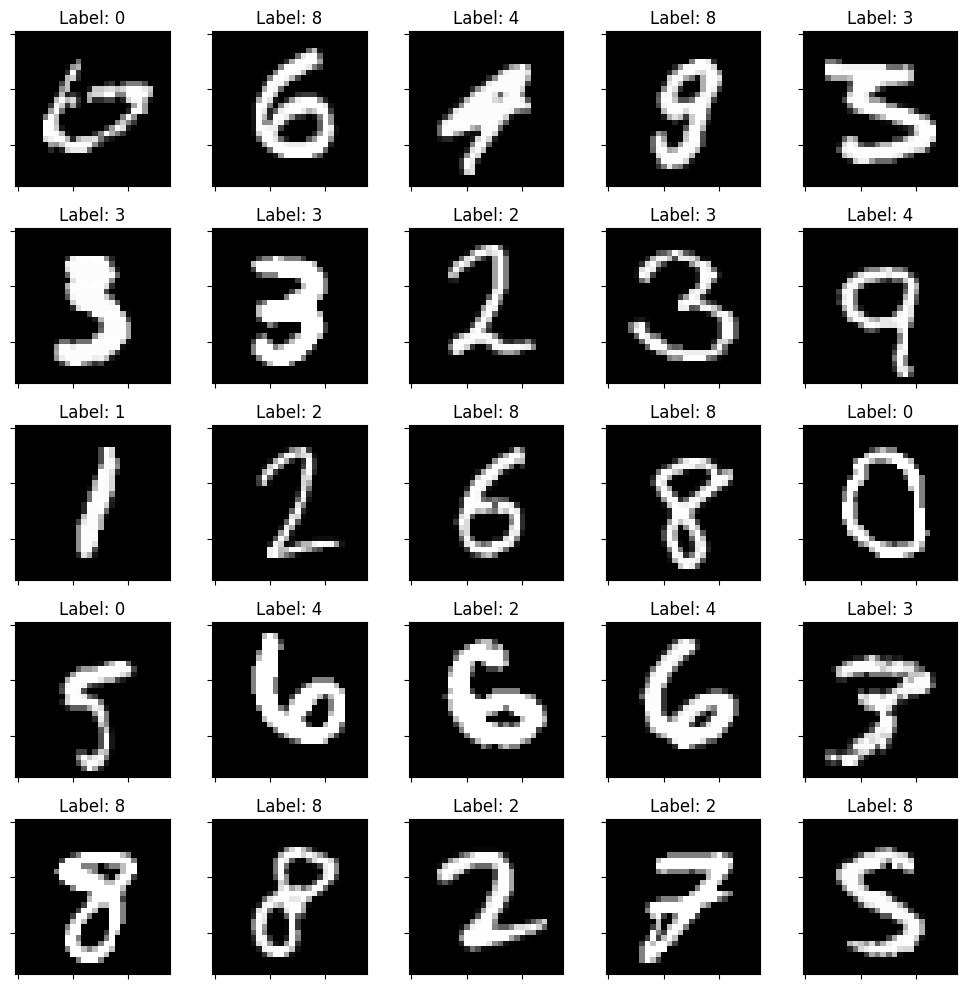

In [21]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from matplotlib import pyplot as plt
numClasses = 10
numFeatures = 784
lr = 0.1
# MNIST data
(xTrain, yTrain),(xTest, yTest) = mnist.load_data()
xTrain, xTest = np.array(xTrain, np.float32), np.array(xTest, np.float32) # uint8
#xTrain, xTest = xTrain.reshape([-1,numFeatures]), xTest.reshape([-1,numFeatures])
xTrain, xTest = xTrain/255., xTest/255.
print(xTrain.shape,yTrain.shape, xTest.shape)

# num_row = 5
# num_col = 5# plot images
# fig, axes = plt.subplots(num_row, num_col, figsize=(2*num_col,2*num_row))
# for i in range(25):
#     ax = axes[i//num_col, i%num_col]
#     ax.imshow(xTrain[i+,:,:], cmap='gray')
#     ax.set_title('Label: {}'.format(yTrain[i+]))
#     ax.tick_params(labelbottom=False)
#     ax.tick_params(labelleft=False)
# plt.tight_layout()

# plt.show()

plt.imshow(xTrain[1,:,:])

print(yTrain[:4])

label = tf.one_hot(yTrain, numClasses)
print(label.shape)

label[:4,:]

# # Prepare the training dataset
# train_dataset = tf.data.Dataset.from_tensor_slices((xTrain, yTrain))
# train_dataset = train_dataset.shuffle(buffer_size=1024).batch(64)

# # Prepare the validation dataset
# val_dataset = tf.data.Dataset.from_tensor_slices((xTest, yTest))
# val_dataset = val_dataset.batch(64)

layers = []

layers.append(tf.keras.layers.Flatten(input_shape=(28, 28)))
layers.append(tf.keras.layers.Dense(10))
layers.append(tf.keras.layers.Softmax())

model = Sequential(layers)

model.summary()

model.compile(
    optimizer=tf.keras.optimizers.Adam(lr),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=['accuracy'],
)

history = model.fit(xTrain, label, epochs=10, batch_size = 60)

plt.plot(history.history['accuracy'])

predY = model.predict(xTest)
classLabel = tf.argmax(predY, 1)

print(classLabel.shape)
print(predY.shape)

xTestImg = np.reshape(xTest, [-1,28,28])

startIndex = 445
num_row = 5
num_col = 5# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(2*num_col,2*num_row))
for i in range(25):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(xTestImg[i+startIndex,:,:], cmap='gray')
    ax.set_title('Label: {}'.format(classLabel[i+startIndex]))
    ax.tick_params(labelbottom=False)
    ax.tick_params(labelleft=False)
plt.tight_layout()

plt.show()

(60000, 28, 28) (60000,) (10000, 28, 28)
[5 0 4 1]
(60000, 10)
Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_23 (Flatten)        (None, 784)               0         
                                                                 
 dense_23 (Dense)            (None, 10)                7850      
                                                                 
 softmax_23 (Softmax)        (None, 10)                0         
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1366 - accuracy: 0.3157
Epoch 2/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1339 - accuracy: 0.3298
Epoch 3/10
1000/

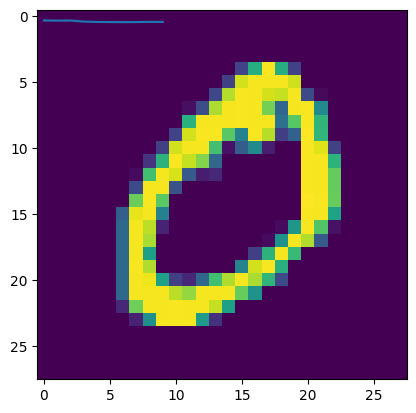

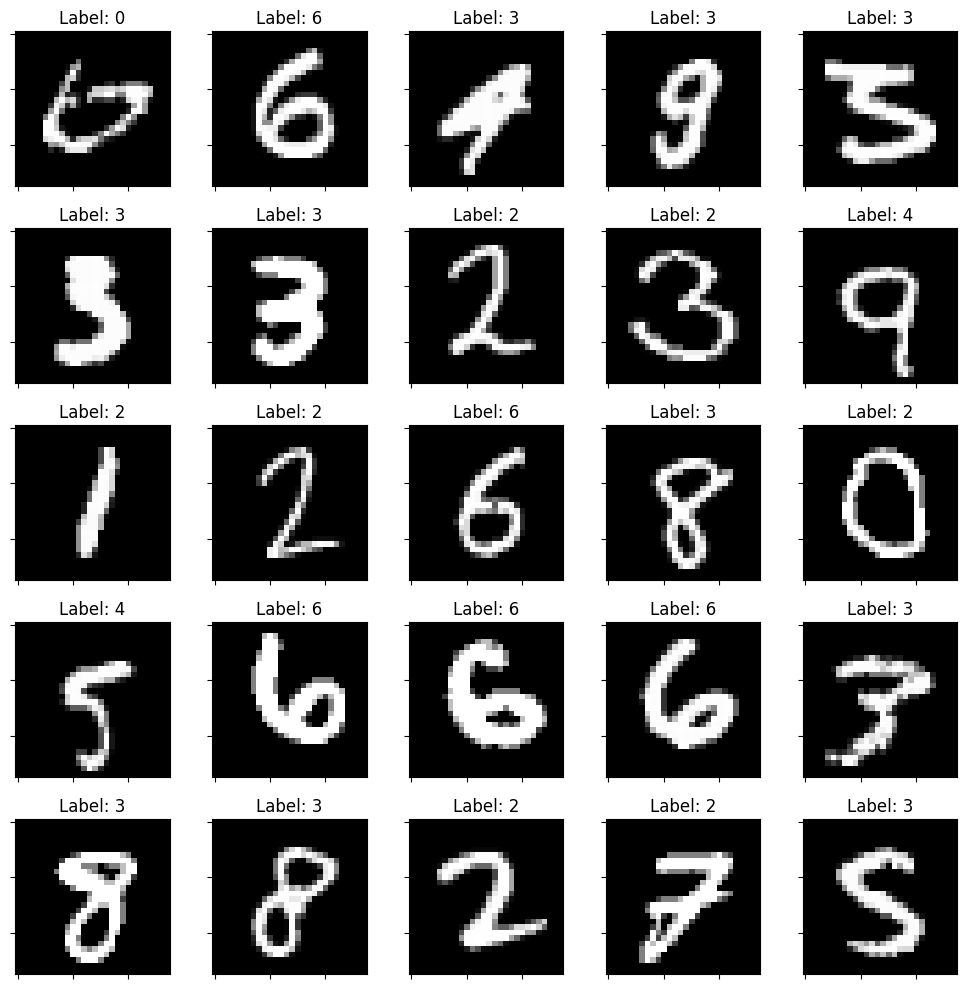

In [24]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from matplotlib import pyplot as plt
numClasses = 10
numFeatures = 784
lr = 1
# MNIST data
(xTrain, yTrain),(xTest, yTest) = mnist.load_data()
xTrain, xTest = np.array(xTrain, np.float32), np.array(xTest, np.float32) # uint8
#xTrain, xTest = xTrain.reshape([-1,numFeatures]), xTest.reshape([-1,numFeatures])
xTrain, xTest = xTrain/255., xTest/255.
print(xTrain.shape,yTrain.shape, xTest.shape)

# num_row = 5
# num_col = 5# plot images
# fig, axes = plt.subplots(num_row, num_col, figsize=(2*num_col,2*num_row))
# for i in range(25):
#     ax = axes[i//num_col, i%num_col]
#     ax.imshow(xTrain[i+,:,:], cmap='gray')
#     ax.set_title('Label: {}'.format(yTrain[i+]))
#     ax.tick_params(labelbottom=False)
#     ax.tick_params(labelleft=False)
# plt.tight_layout()

# plt.show()

plt.imshow(xTrain[1,:,:])

print(yTrain[:4])

label = tf.one_hot(yTrain, numClasses)
print(label.shape)

label[:4,:]

# # Prepare the training dataset
# train_dataset = tf.data.Dataset.from_tensor_slices((xTrain, yTrain))
# train_dataset = train_dataset.shuffle(buffer_size=1024).batch(64)

# # Prepare the validation dataset
# val_dataset = tf.data.Dataset.from_tensor_slices((xTest, yTest))
# val_dataset = val_dataset.batch(64)

layers = []

layers.append(tf.keras.layers.Flatten(input_shape=(28, 28)))
layers.append(tf.keras.layers.Dense(10))
layers.append(tf.keras.layers.Softmax())

model = Sequential(layers)

model.summary()

model.compile(
    optimizer=tf.keras.optimizers.Adam(lr),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=['accuracy'],
)

history = model.fit(xTrain, label, epochs=10, batch_size = 60)

plt.plot(history.history['accuracy'])

predY = model.predict(xTest)
classLabel = tf.argmax(predY, 1)

print(classLabel.shape)
print(predY.shape)

xTestImg = np.reshape(xTest, [-1,28,28])

startIndex = 445
num_row = 5
num_col = 5# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(2*num_col,2*num_row))
for i in range(25):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(xTestImg[i+startIndex,:,:], cmap='gray')
    ax.set_title('Label: {}'.format(classLabel[i+startIndex]))
    ax.tick_params(labelbottom=False)
    ax.tick_params(labelleft=False)
plt.tight_layout()

plt.show()

(60000, 28, 28) (60000,) (10000, 28, 28)
[5 0 4 1]
(60000, 10)
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_22 (Flatten)        (None, 784)               0         
                                                                 
 dense_22 (Dense)            (None, 10)                7850      
                                                                 
 softmax_22 (Softmax)        (None, 10)                0         
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1379 - accuracy: 0.3099
Epoch 2/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1396 - accuracy: 0.3016
Epoch 3/10
1000/

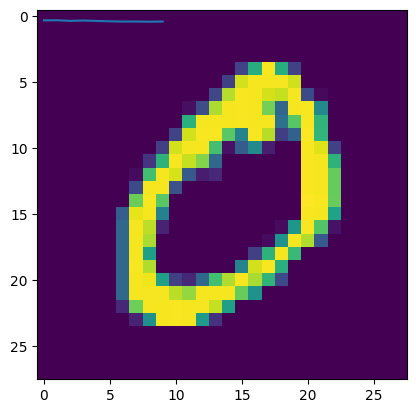

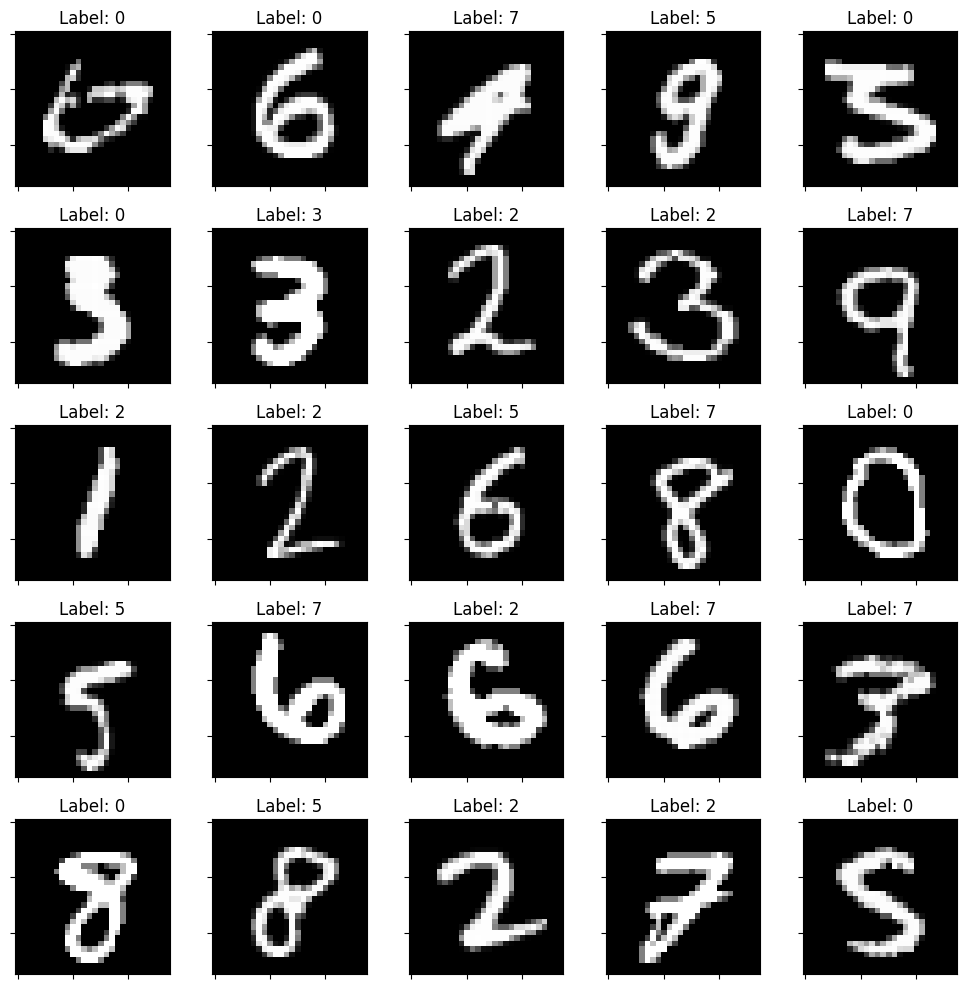

In [23]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from matplotlib import pyplot as plt
numClasses = 10
numFeatures = 784
lr = 3
# MNIST data
(xTrain, yTrain),(xTest, yTest) = mnist.load_data()
xTrain, xTest = np.array(xTrain, np.float32), np.array(xTest, np.float32) # uint8
#xTrain, xTest = xTrain.reshape([-1,numFeatures]), xTest.reshape([-1,numFeatures])
xTrain, xTest = xTrain/255., xTest/255.
print(xTrain.shape,yTrain.shape, xTest.shape)

# num_row = 5
# num_col = 5# plot images
# fig, axes = plt.subplots(num_row, num_col, figsize=(2*num_col,2*num_row))
# for i in range(25):
#     ax = axes[i//num_col, i%num_col]
#     ax.imshow(xTrain[i+,:,:], cmap='gray')
#     ax.set_title('Label: {}'.format(yTrain[i+]))
#     ax.tick_params(labelbottom=False)
#     ax.tick_params(labelleft=False)
# plt.tight_layout()

# plt.show()

plt.imshow(xTrain[1,:,:])

print(yTrain[:4])

label = tf.one_hot(yTrain, numClasses)
print(label.shape)

label[:4,:]

# # Prepare the training dataset
# train_dataset = tf.data.Dataset.from_tensor_slices((xTrain, yTrain))
# train_dataset = train_dataset.shuffle(buffer_size=1024).batch(64)

# # Prepare the validation dataset
# val_dataset = tf.data.Dataset.from_tensor_slices((xTest, yTest))
# val_dataset = val_dataset.batch(64)

layers = []

layers.append(tf.keras.layers.Flatten(input_shape=(28, 28)))
layers.append(tf.keras.layers.Dense(10))
layers.append(tf.keras.layers.Softmax())

model = Sequential(layers)

model.summary()

model.compile(
    optimizer=tf.keras.optimizers.Adam(lr),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=['accuracy'],
)

history = model.fit(xTrain, label, epochs=10, batch_size = 60)

plt.plot(history.history['accuracy'])

predY = model.predict(xTest)
classLabel = tf.argmax(predY, 1)

print(classLabel.shape)
print(predY.shape)

xTestImg = np.reshape(xTest, [-1,28,28])

startIndex = 445
num_row = 5
num_col = 5# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(2*num_col,2*num_row))
for i in range(25):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(xTestImg[i+startIndex,:,:], cmap='gray')
    ax.set_title('Label: {}'.format(classLabel[i+startIndex]))
    ax.tick_params(labelbottom=False)
    ax.tick_params(labelleft=False)
plt.tight_layout()

plt.show()

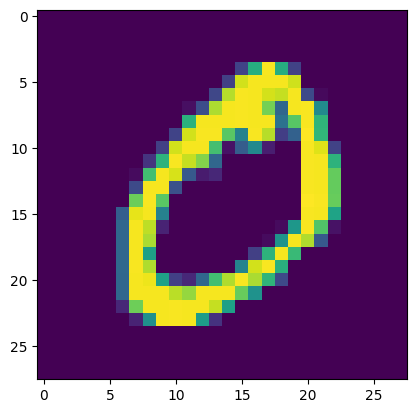

Epoch 1/10
1000/1000 [==============================] - 6s 5ms/step - loss: 0.0226 - accuracy: 0.8645
Epoch 2/10
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0136 - accuracy: 0.9153
Epoch 3/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0124 - accuracy: 0.9224
Epoch 4/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0118 - accuracy: 0.9263
Epoch 5/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0113 - accuracy: 0.9289
Epoch 6/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0110 - accuracy: 0.9304
Epoch 7/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0108 - accuracy: 0.9322
Epoch 8/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0106 - accuracy: 0.9339
Epoch 9/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0104 - accuracy: 0.9349
Epoch 10/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.010

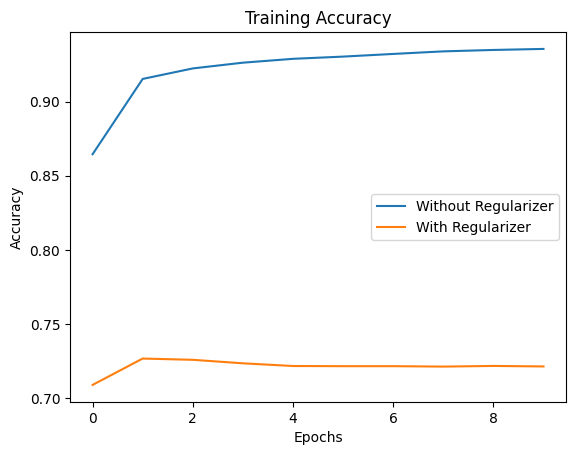

In [34]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax
from matplotlib import pyplot as plt

numClasses = 10
numFeatures = 784
lr = 0.001

# MNIST data
(xTrain, yTrain), (xTest, yTest) = mnist.load_data()
xTrain, xTest = np.array(xTrain, np.float32), np.array(xTest, np.float32)
xTrain, xTest = xTrain / 255., xTest / 255.

plt.imshow(xTrain[1, :, :])
plt.show()

label = tf.one_hot(yTrain, numClasses)

# Without regularization
layers_without_regularizer = [
    Flatten(input_shape=(28, 28)),
    Dense(10),
    Softmax()
]

model_without_regularizer = Sequential(layers_without_regularizer)

model_without_regularizer.compile(
    optimizer=tf.keras.optimizers.Adam(lr),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=['accuracy'],
)

history_without_regularizer = model_without_regularizer.fit(xTrain, label, epochs=10, batch_size=60)

# With L2 regularization
layers_with_regularizer = [
    Flatten(input_shape=(28, 28)),
    Dense(10, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Softmax()
]

model_with_regularizer = Sequential(layers_with_regularizer)

model_with_regularizer.compile(
    optimizer=tf.keras.optimizers.Adam(lr),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=['accuracy'],
)

history_with_regularizer = model_with_regularizer.fit(xTrain, label, epochs=10, batch_size=60)

# Plot accuracy for both models
plt.plot(history_without_regularizer.history['accuracy'], label='Without Regularizer')
plt.plot(history_with_regularizer.history['accuracy'], label='With Regularizer')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.show()


(60000, 28, 28) (60000,) (10000, 28, 28)
[5 0 4 1]
(60000, 10)
Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_36 (Flatten)        (None, 784)               0         
                                                                 
 dropout_2 (Dropout)         (None, 784)               0         
                                                                 
 dense_40 (Dense)            (None, 10)                7850      
                                                                 
 softmax_35 (Softmax)        (None, 10)                0         
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0297 - acc

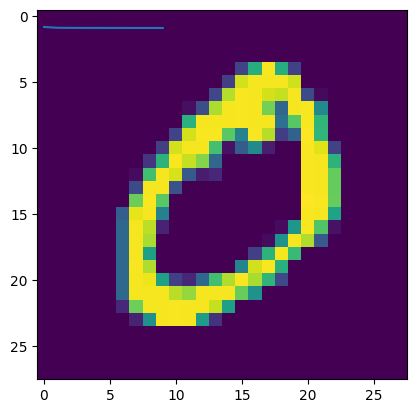

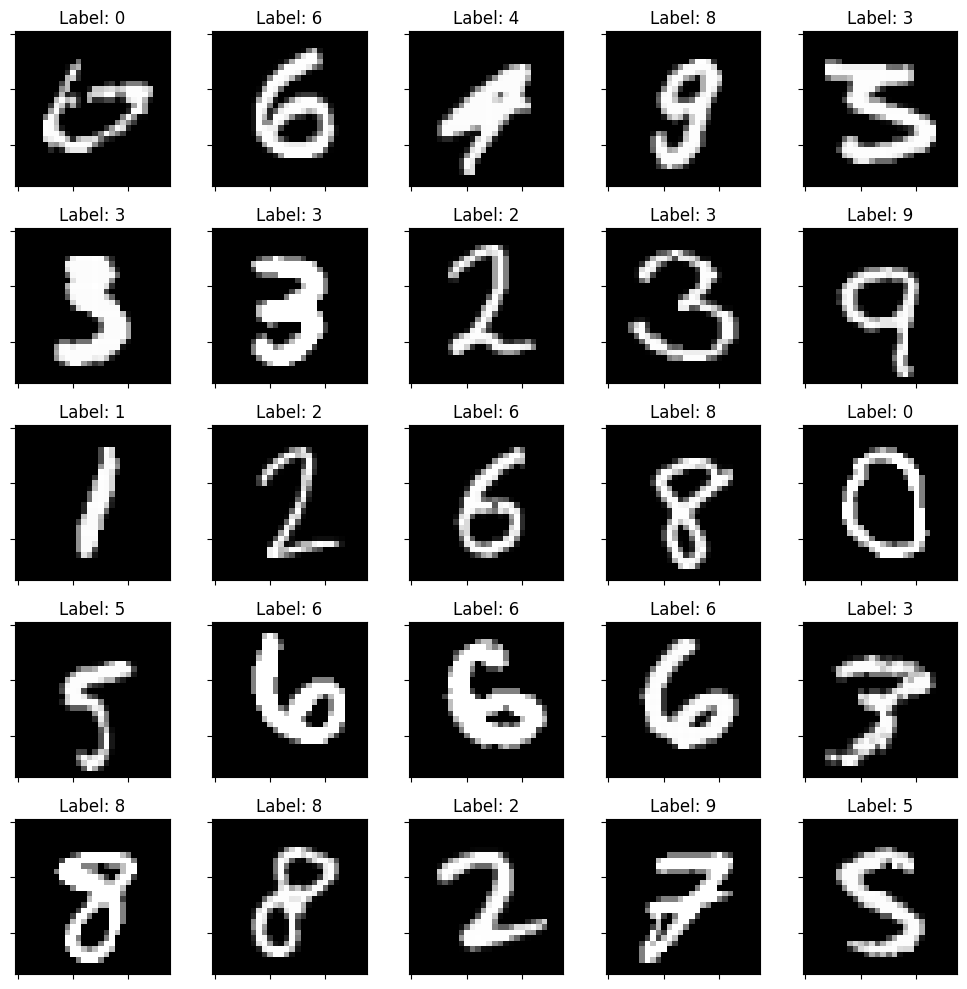

In [37]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from matplotlib import pyplot as plt
numClasses = 10
numFeatures = 784
lr = 0.001
# MNIST data
(xTrain, yTrain),(xTest, yTest) = mnist.load_data()
xTrain, xTest = np.array(xTrain, np.float32), np.array(xTest, np.float32) # uint8
#xTrain, xTest = xTrain.reshape([-1,numFeatures]), xTest.reshape([-1,numFeatures])
xTrain, xTest = xTrain/255., xTest/255.
print(xTrain.shape,yTrain.shape, xTest.shape)

# num_row = 5
# num_col = 5# plot images
# fig, axes = plt.subplots(num_row, num_col, figsize=(2*num_col,2*num_row))
# for i in range(25):
#     ax = axes[i//num_col, i%num_col]
#     ax.imshow(xTrain[i+,:,:], cmap='gray')
#     ax.set_title('Label: {}'.format(yTrain[i+]))
#     ax.tick_params(labelbottom=False)
#     ax.tick_params(labelleft=False)
# plt.tight_layout()

# plt.show()

plt.imshow(xTrain[1,:,:])

print(yTrain[:4])

label = tf.one_hot(yTrain, numClasses)
print(label.shape)

label[:4,:]

# # Prepare the training dataset
# train_dataset = tf.data.Dataset.from_tensor_slices((xTrain, yTrain))
# train_dataset = train_dataset.shuffle(buffer_size=1024).batch(64)

# # Prepare the validation dataset
# val_dataset = tf.data.Dataset.from_tensor_slices((xTest, yTest))
# val_dataset = val_dataset.batch(64)

layers = []

layers.append(tf.keras.layers.Flatten(input_shape=(28, 28)))
layers.append(tf.keras.layers.Dropout(0.5))
layers.append(tf.keras.layers.Dense(10))
layers.append(tf.keras.layers.Softmax())

model = Sequential(layers)

model.summary()

model.compile(
    optimizer=tf.keras.optimizers.Adam(lr),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=['accuracy'],
)

history = model.fit(xTrain, label, epochs=10, batch_size = 60)

plt.plot(history.history['accuracy'])

predY = model.predict(xTest)
classLabel = tf.argmax(predY, 1)

print(classLabel.shape)
print(predY.shape)

xTestImg = np.reshape(xTest, [-1,28,28])

startIndex = 445
num_row = 5
num_col = 5# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(2*num_col,2*num_row))
for i in range(25):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(xTestImg[i+startIndex,:,:], cmap='gray')
    ax.set_title('Label: {}'.format(classLabel[i+startIndex]))
    ax.tick_params(labelbottom=False)
    ax.tick_params(labelleft=False)
plt.tight_layout()

plt.show()

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3)


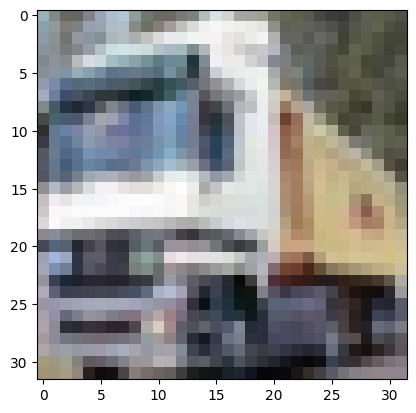

[[6]
 [9]
 [9]
 [4]]
(50000, 10)
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 3072)              0         
                                                                 
 dense_9 (Dense)             (None, 128)               393344    
                                                                 
 dense_10 (Dense)            (None, 10)                1290      
                                                                 
 softmax_1 (Softmax)         (None, 10)                0         
                                                                 
Total params: 394634 (1.51 MB)
Trainable params: 394634 (1.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
834/834 [==============================] - 6s 6ms/step - loss: 1.9280 - accuracy: 0.3064
Epoch 2/10
834/83

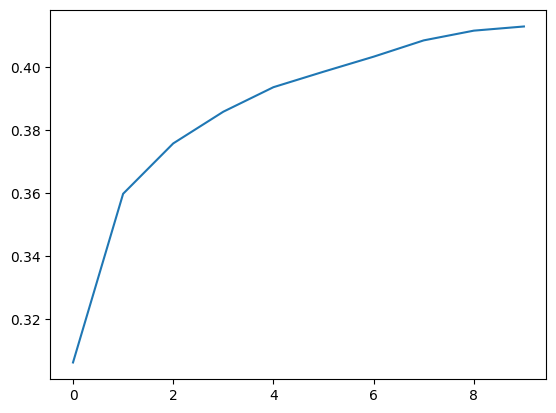

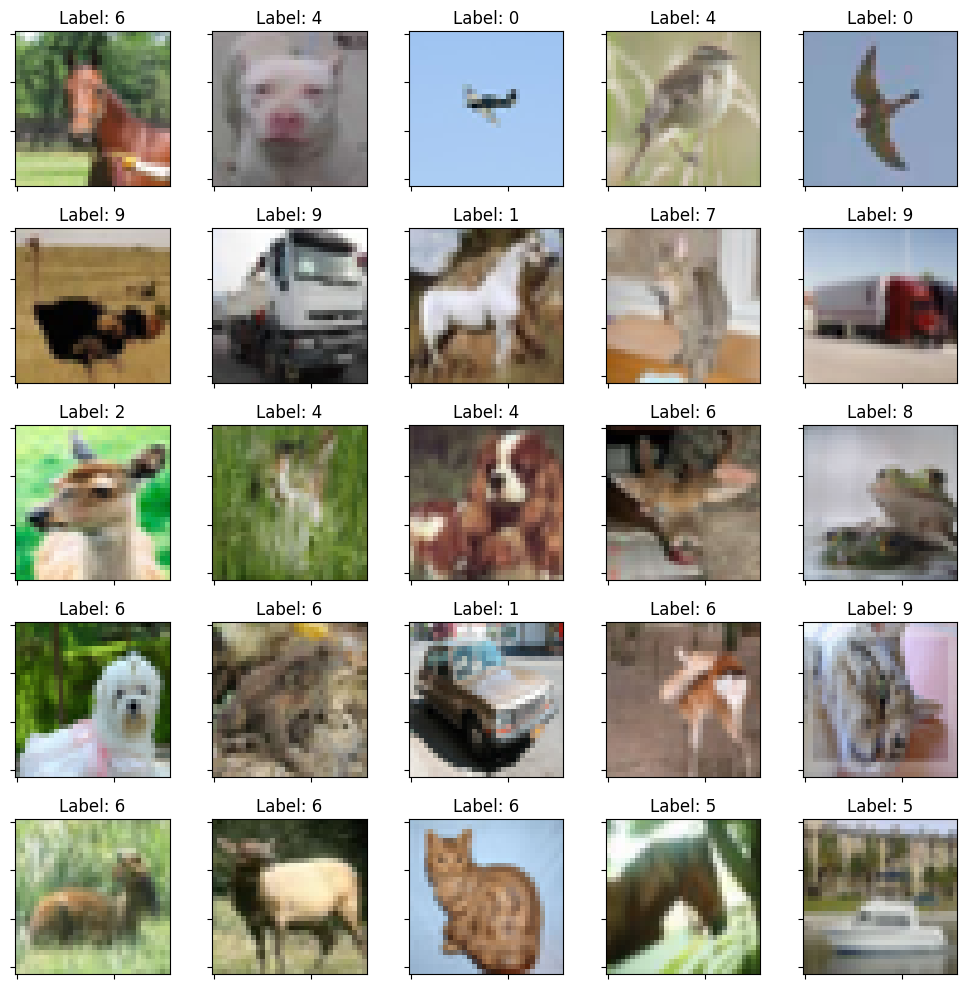

In [6]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Softmax
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load CIFAR-10 data
(xTrain, yTrain), (xTest, yTest) = cifar10.load_data()
xTrain, xTest = np.array(xTrain, np.float32) / 255.0, np.array(xTest, np.float32) / 255.0

print(xTrain.shape, yTrain.shape, xTest.shape)

# Display a sample image
plt.imshow(xTrain[1])
plt.show()

# Print labels of first 4 training samples
print(yTrain[:4])

numClasses = 10

# One-hot encode the labels
label = to_categorical(yTrain, numClasses)
print(label.shape)

lr = 0.001  # Learning rate

# Build the model
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(128, activation='relu'),
    Dense(numClasses),
    Softmax()
])

model.summary()

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(lr),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

# Train the model
history = model.fit(xTrain, label, epochs=10, batch_size=60)

# Plot accuracy over training epochs
plt.plot(history.history['accuracy'])

# Make predictions on the test set
predY = model.predict(xTest)
classLabel = tf.argmax(predY, 1)

print(classLabel.shape)
print(predY.shape)

# Display a subset of test images and their predicted labels
startIndex = 445
num_row = 5
num_col = 5
fig, axes = plt.subplots(num_row, num_col, figsize=(2*num_col, 2*num_row))
for i in range(25):
    ax = axes[i // num_col, i % num_col]
    ax.imshow(xTest[i + startIndex])
    ax.set_title('Label: {}'.format(classLabel[i + startIndex]))
    ax.tick_params(labelbottom=False)
    ax.tick_params(labelleft=False)
plt.tight_layout()
plt.show()
